#### Check the terminal


In [2]:
print("hello world")

hello world


### Import Libraries

In [ ]:
# %pip install matplotlib
%pip install seaborn

In [28]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn

### Import Dataset

In [7]:
path=r'C:\Users\Ravi\OneDrive\Desktop\edtech\Module-9(Python)\Projects\Batch\src\Libraries\Pandas\BMW sales data (2010-2024) (1).csv'
df=pd.read_csv(path)
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


#### General Inspection

In [ ]:
df.describe()  
# print("The count of rows is ")

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [10]:
data_columns=df.columns
data_columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

#### Step1: Find Unique values from the car models

In [13]:
unique_model_count=df["Model"].value_counts()
unique_model_count.dtype
unique_model_count

Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64

#### Find the total revnue generated and the total sales volume count for each unique model

In [ ]:
df.groupby("Model").agg({
    "Price_USD": "sum",
    "Sales_Volume": "sum"
})


In [32]:
df_aggregate_region=df.groupby("Region").agg(Total_revenue_per_region=("Price_USD","sum"))
df_aggregate_region

,Total_revenue_per_region
Region,
Africa,618032273
Asia,638741336
Europe,624952966
Middle East,625687400
North America,625708906
South America,618607164


In [ ]:
df_aggregate_Model=df.groupby("Model").agg(
    Total_Price_USD=("Price_USD", "sum"),
    Total_Sales_Volume=("Sales_Volume", "sum"),
    Avg_Price_USD=("Price_USD", "mean")
).reset_index()
df_aggregate_Model

In [22]:
df_aggregate_Model_Year=df.groupby(["Model", "Year"]).agg(
    Total_Price_USD=("Price_USD", "sum"),
    Total_Sales_Volume=("Sales_Volume", "sum"),
    Avg_Price_USD=("Price_USD", "mean"),
    Count_Rows=("Model","count")
).reset_index()
df_aggregate_Model_Year

,Model,Year,Total_Price_USD,Total_Sales_Volume,Avg_Price_USD,Count_Rows
0,3 Series,2010,23932107,1647769,75495.605678,317
1,3 Series,2011,22114729,1473102,75476.890785,293
2,3 Series,2012,20978945,1378152,75193.351254,279
3,3 Series,2013,21863641,1448530,73122.545151,299
4,3 Series,2014,24228860,1682545,75244.906832,322
...,...,...,...,...,...,...
160,i8,2020,21760251,1443078,75819.689895,287
161,i8,2021,22022774,1471816,74907.394558,294
162,i8,2022,22744607,1592647,73369.700000,310
163,i8,2023,23140462,1537056,76119.940789,304


In [25]:
df_new = df.merge(
    df_aggregate_Model_Year[["Count_Rows","Model", "Year", "Total_Price_USD", "Avg_Price_USD", "Total_Sales_Volume"]],
    on=["Model", "Year"],
    how="left"
).sort_values(["Model", "Year"])

df_new.head()



,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Count_Rows,Total_Price_USD,Avg_Price_USD,Total_Sales_Volume
146,3 Series,2010,Asia,Black,Petrol,Manual,2.1,107572,86660,8650,High,317,23932107,75495.605678,1647769
663,3 Series,2010,Africa,Red,Diesel,Automatic,4.1,123015,105114,8248,High,317,23932107,75495.605678,1647769
739,3 Series,2010,North America,Black,Diesel,Automatic,1.8,172040,45092,6364,Low,317,23932107,75495.605678,1647769
929,3 Series,2010,North America,Silver,Hybrid,Manual,2.5,136265,98452,7885,High,317,23932107,75495.605678,1647769
957,3 Series,2010,Middle East,Blue,Diesel,Automatic,1.7,149295,109920,6039,Low,317,23932107,75495.605678,1647769


#### Plots

#### Average Price per Model (Bar Plot)

C:\Users\Ravi\AppData\Local\Temp\ipykernel_31916\425292402.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_new, x="Model", y="Avg_Price_USD", ci=None, palette="Blues")
C:\Users\Ravi\AppData\Local\Temp\ipykernel_31916\425292402.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_new, x="Model", y="Avg_Price_USD", ci=None, palette="Blues")


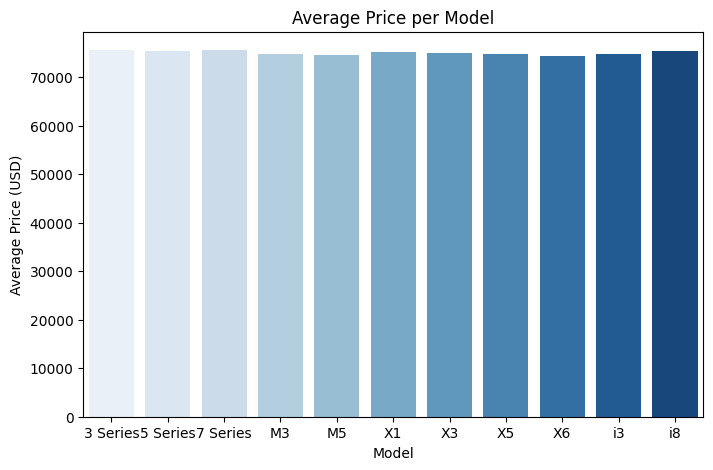

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=df_new, x="Model", y="Avg_Price_USD", ci=None, palette="Blues")
plt.title("Average Price per Model")
plt.ylabel("Average Price (USD)")
plt.xlabel("Model")
plt.show()


#### Total Sales Volume per Region (Bar Plot)

C:\Users\Ravi\AppData\Local\Temp\ipykernel_31916\3362009775.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_new, x="Region", y="Total_Sales_Volume", ci=None, palette="viridis")
C:\Users\Ravi\AppData\Local\Temp\ipykernel_31916\3362009775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_new, x="Region", y="Total_Sales_Volume", ci=None, palette="viridis")


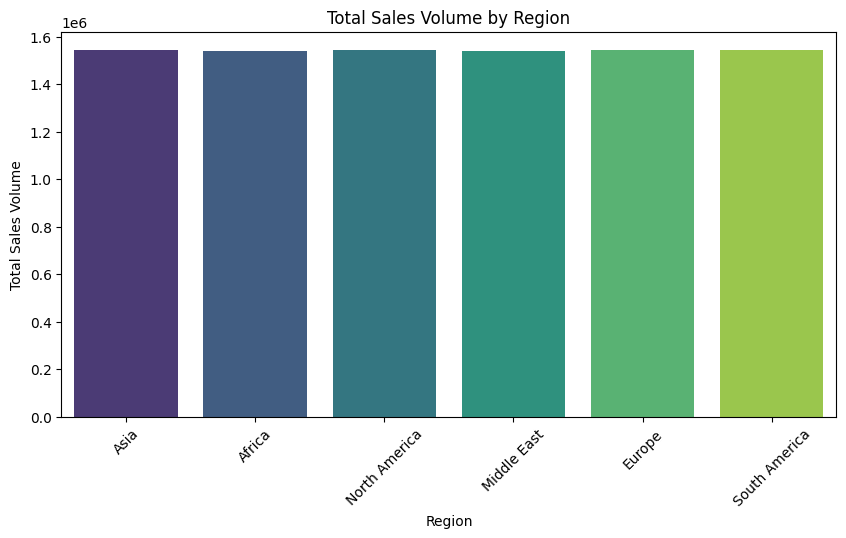

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_new, x="Region", y="Total_Sales_Volume", ci=None, palette="viridis")
plt.title("Total Sales Volume by Region")
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=45)
plt.show()


#### Year vs Total Price Trend (Line Plot)

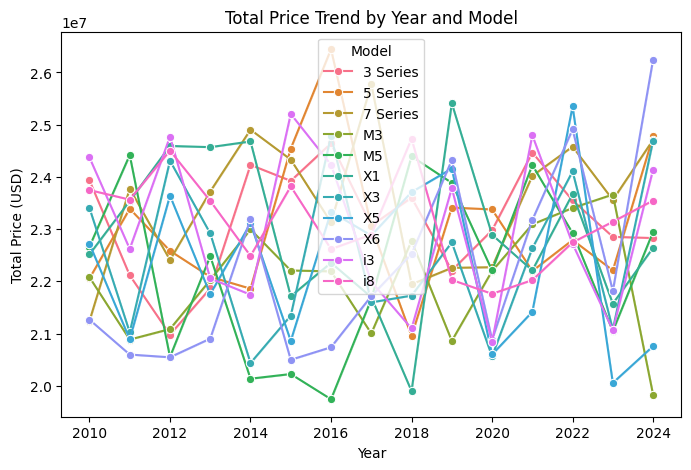

In [33]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_new, x="Year", y="Total_Price_USD", hue="Model", marker="o")
plt.title("Total Price Trend by Year and Model")
plt.ylabel("Total Price (USD)")
plt.show()


#### Engine Size vs Price (Scatter Plot)

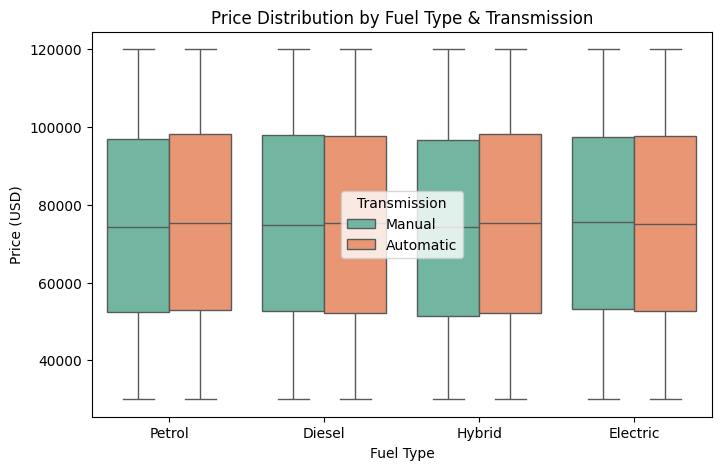

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_new, x="Fuel_Type", y="Price_USD", hue="Transmission", palette="Set2")
plt.title("Price Distribution by Fuel Type & Transmission")
plt.xlabel("Fuel Type")
plt.ylabel("Price (USD)")
plt.legend(title="Transmission")
plt.show()


#### Distribution of Mileage (Histogram)

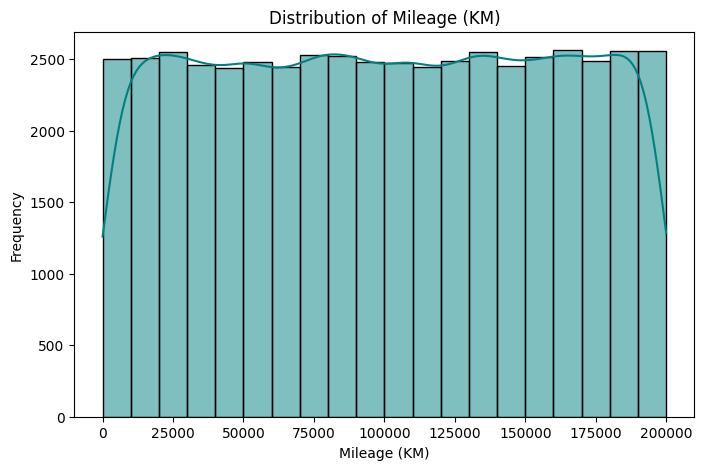

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df_new["Mileage_KM"], bins=20, kde=True, color="teal")
plt.title("Distribution of Mileage (KM)")
plt.xlabel("Mileage (KM)")
plt.ylabel("Frequency")
plt.show()


#### Sales Classification Count (Count Plot)

C:\Users\Ravi\AppData\Local\Temp\ipykernel_31916\2750585835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x="Sales_Classification", palette="pastel")


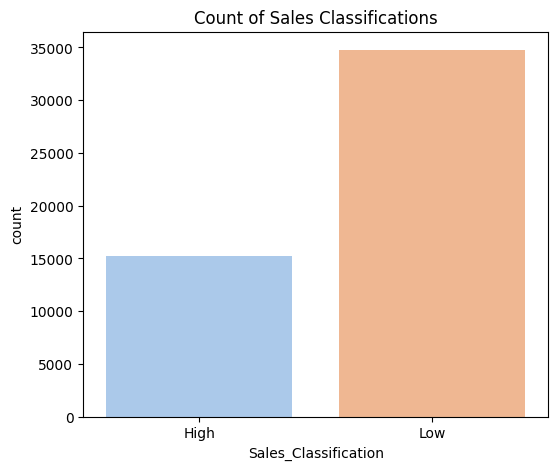

In [40]:
plt.figure(figsize=(6,5))
sns.countplot(data=df_new, x="Sales_Classification", palette="pastel")
plt.title("Count of Sales Classifications")
plt.show()


#### Average Price by Fuel Type across Regions (Grouped Bar)

C:\Users\Ravi\AppData\Local\Temp\ipykernel_31916\2329174056.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_new, x="Region", y="Avg_Price_USD", hue="Fuel_Type", ci=None)


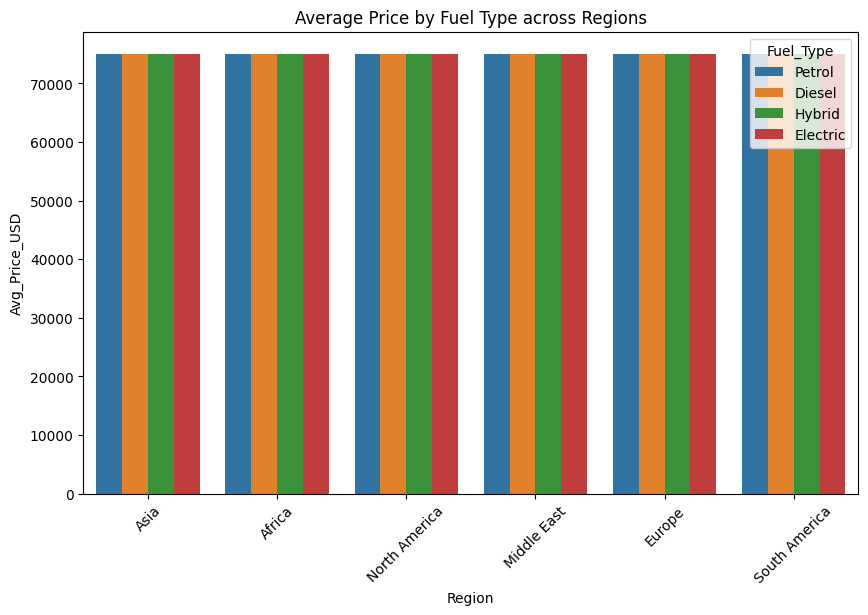

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_new, x="Region", y="Avg_Price_USD", hue="Fuel_Type", ci=None)
plt.title("Average Price by Fuel Type across Regions")
plt.xticks(rotation=45)
plt.show()
